# Exploratory Data Analysis: xAPI-Edu-Data

This notebook provides a comprehensive exploratory data analysis of the xAPI Educational Data dataset, which contains student performance data with various behavioral and demographic features.

## Dataset Overview
The dataset contains information about student interactions and performance in an educational system, including:
- Demographic information (gender, nationality, place of birth)
- Academic context (stage, grade, section, topic, semester)
- Behavioral metrics (raised hands, visited resources, announcements viewed, discussions)
- Parental involvement (survey responses, satisfaction)
- Student absence days
- **Target Variable**: Class (L=Low, M=Medium, H=High performance)


In [1]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 1.26.4
Matplotlib version: 3.10.1
Seaborn version: 0.13.2


## 1. Data Loading and Initial Inspection


In [3]:
# Load the dataset
# Handle path relative to notebook location or project root
import os

# Try multiple possible paths
possible_paths = [
    '../../datasets/xapi-edu-data/xAPI-Edu-Data.csv',  # From pretests/charaka/
    'datasets/xapi-edu-data/xAPI-Edu-Data.csv',        # From project root
    '../datasets/xapi-edu-data/xAPI-Edu-Data.csv'      # From pretests/
]

dataset_path = None
for path in possible_paths:
    if os.path.exists(path):
        dataset_path = path
        break

if dataset_path is None:
    raise FileNotFoundError(f"Could not find dataset. Tried: {possible_paths}")

df = pd.read_csv(dataset_path)
print(f"Dataset loaded from: {os.path.abspath(dataset_path)}")

# Column name mapping: original -> standardized (for internal use)
column_name_mapping = {
    'VisITedResources': 'VisitedResources',
    'NationalITy': 'Nationality'
}

# Column display labels: internal name -> display label (for visualizations)
column_display_labels = {
    'gender': 'Gender',
    'Nationality': 'Nationality',
    'PlaceofBirth': 'Place of Birth',
    'StageID': 'Stage ID',
    'GradeID': 'Grade ID',
    'SectionID': 'Section ID',
    'Topic': 'Topic',
    'Semester': 'Semester',
    'Relation': 'Relation',
    'raisedhands': 'Raised Hands',
    'VisitedResources': 'Visited Resources',
    'AnnouncementsView': 'Announcements View',
    'Discussion': 'Discussion',
    'ParentAnsweringSurvey': 'Parent Answering Survey',
    'ParentschoolSatisfaction': 'Parent School Satisfaction',
    'StudentAbsenceDays': 'Student Absence Days',
    'Class': 'Class'
}

def get_display_label(col_name):
    """Get display label for a column name. Returns original name if not found in mapping."""
    return column_display_labels.get(col_name, col_name)

# Fix column name capitalization/spelling issues
df.rename(columns=column_name_mapping, inplace=True)

# Print corrections
if column_name_mapping:
    corrections = ", ".join([f"{old} → {new}" for old, new in column_name_mapping.items()])
    print(f"\n✓ Column names corrected: {corrections}")

# Display basic information
print("=" * 60)
print("DATASET SHAPE")
print("=" * 60)
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print("\n" + "=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
df.head(10)


Dataset loaded from: /Users/charaka/Desktop/Projects/uom-student-performance-analytics/datasets/xapi-edu-data/xAPI-Edu-Data.csv

✓ Column names corrected: VisITedResources → VisitedResources, NationalITy → Nationality
DATASET SHAPE
Rows: 480
Columns: 17

FIRST FEW ROWS


,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
# Display column names and data types
print("=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
print("\nColumn Names:")
print(df.columns.tolist())
print("\n" + "-" * 60)
print("\nData Types:")
print(df.dtypes)
print("\n" + "-" * 60)
print("\nDataset Info:")
df.info()


COLUMN INFORMATION

Column Names:
['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisitedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

------------------------------------------------------------

Data Types:
gender                      object
Nationality                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisitedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

-----------------

In [5]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")


MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!


In [6]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 2
Percentage of duplicates: 0.42%

Sample duplicate rows:
    gender Nationality PlaceofBirth     StageID GradeID SectionID   Topic  \
322      M      Jordan       Jordan  lowerlevel    G-02         A  French   
323      M      Jordan       Jordan  lowerlevel    G-02         A  French   
326      M      Jordan       Jordan  lowerlevel    G-02         A  French   
327      M      Jordan       Jordan  lowerlevel    G-02         A  French   

    Semester Relation  raisedhands  VisitedResources  AnnouncementsView  \
322        F   Father           10                15                 10   
323        S   Father           30                10                 20   
326        F   Father           10                15                 10   
327        S   Father           30                10                 20   

     Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
322          21                    No                      Bad  

## 2. Data Cleaning and Preprocessing


In [7]:
# Create a copy for analysis
df_clean = df.copy()

# Strip any whitespace from column names (already fixed capitalization in previous cell)
df_clean.columns = df_clean.columns.str.strip()

# Display unique values for categorical columns to understand the data better
print("=" * 60)
print("CATEGORICAL COLUMNS - UNIQUE VALUES")
print("=" * 60)

categorical_cols = ['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID', 
                    'SectionID', 'Topic', 'Semester', 'Relation', 
                    'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 
                    'StudentAbsenceDays', 'Class']

for col in categorical_cols:
    if col in df_clean.columns:
        unique_vals = df_clean[col].unique()
        print(f"\n{col}:")
        print(f"  Unique values ({len(unique_vals)}): {sorted(unique_vals)}")
        print(f"  Value counts:")
        print(df_clean[col].value_counts().head(10))


CATEGORICAL COLUMNS - UNIQUE VALUES

gender:
  Unique values (2): ['F', 'M']
  Value counts:
gender
M    305
F    175
Name: count, dtype: int64

Nationality:
  Unique values (14): ['Egypt', 'Iran', 'Iraq', 'Jordan', 'KW', 'Lybia', 'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA', 'lebanon', 'venzuela']
  Value counts:
Nationality
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Name: count, dtype: int64

PlaceofBirth:
  Unique values (14): ['Egypt', 'Iran', 'Iraq', 'Jordan', 'KuwaIT', 'Lybia', 'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA', 'lebanon', 'venzuela']
  Value counts:
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Name: count, dtype: int64

StageID:
  Un

In [8]:
# Separate numerical and categorical columns
numerical_cols = ['raisedhands', 'VisitedResources', 'AnnouncementsView', 'Discussion']
categorical_cols = ['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID', 
                    'SectionID', 'Topic', 'Semester', 'Relation', 
                    'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 
                    'StudentAbsenceDays']
target_col = 'Class'

# Class label mapping for consistent visualization
class_label_map = {'L': 'Low (L)', 'M': 'Medium (M)', 'H': 'High (H)'}

# Define class order (L -> M -> H) for consistent ordering across all visualizations
class_order = ['L', 'M', 'H']

def get_class_labels(classes):
    """Get full labels for class codes in the same order as classes."""
    return [class_label_map[cls] for cls in classes]

def get_sorted_classes(df, target_col):
    """Get classes in the correct order (L, M, H), filtering to only include classes present in data."""
    return [cls for cls in class_order if cls in df[target_col].unique()]

print("=" * 60)
print("COLUMN CATEGORIZATION")
print("=" * 60)
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nTarget variable: {target_col}")


COLUMN CATEGORIZATION
Numerical columns (4): ['raisedhands', 'VisitedResources', 'AnnouncementsView', 'Discussion']

Categorical columns (12): ['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

Target variable: Class


## 3. Statistical Summary


In [9]:
# Statistical summary for numerical columns
print("=" * 60)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 60)
df_clean[numerical_cols].describe()


STATISTICAL SUMMARY - NUMERICAL FEATURES


,raisedhands,VisitedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [10]:
# Additional statistics
print("=" * 60)
print("ADDITIONAL STATISTICS")
print("=" * 60)
print("\nSkewness:")
print(df_clean[numerical_cols].skew())
print("\nKurtosis:")
print(df_clean[numerical_cols].kurtosis())


ADDITIONAL STATISTICS

Skewness:
raisedhands          0.026962
VisitedResources    -0.342441
AnnouncementsView    0.399243
Discussion           0.362594
dtype: float64

Kurtosis:
raisedhands         -1.496998
VisitedResources    -1.485203
AnnouncementsView   -1.002241
Discussion          -1.126560
dtype: float64


## 4. Target Variable Analysis


TARGET VARIABLE DISTRIBUTION
       Count  Percentage
Class                   
L        127   26.458333
M        211   43.958333
H        142   29.583333


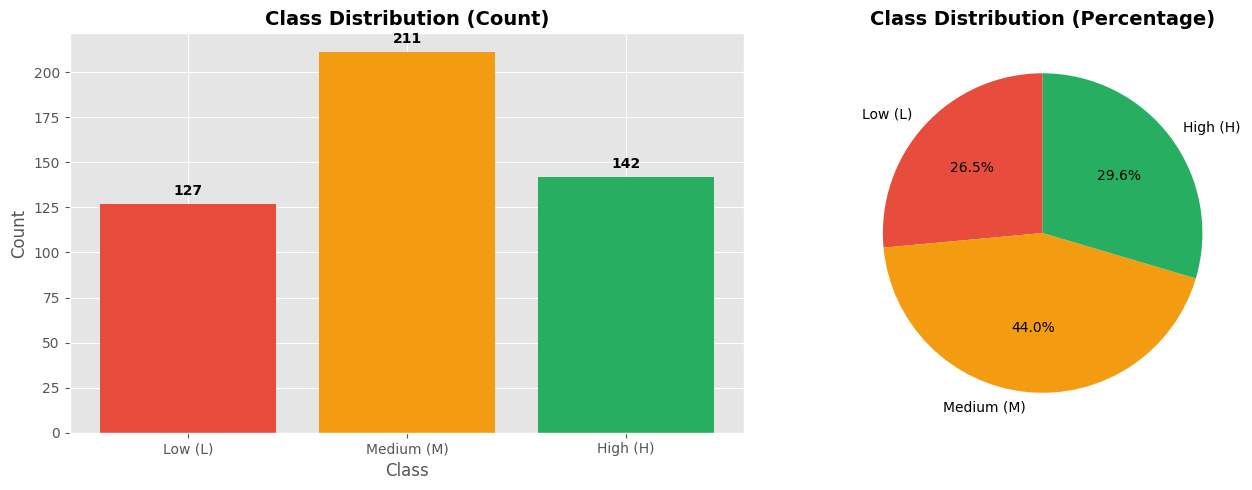

In [11]:
# Target variable distribution
print("=" * 60)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 60)
sorted_classes = get_sorted_classes(df_clean, target_col)
class_dist = df_clean[target_col].value_counts().reindex(sorted_classes)
class_percent = (df_clean[target_col].value_counts(normalize=True).reindex(sorted_classes) * 100)

target_summary = pd.DataFrame({
    'Count': class_dist,
    'Percentage': class_percent
})
print(target_summary)

# Get labels in the same order as sorted classes
class_labels = get_class_labels(sorted_classes)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(target_summary.index, target_summary['Count'], color=['#e74c3c', '#f39c12', '#27ae60'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(class_labels)
for i, v in enumerate(target_summary['Count']):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Percentage pie chart
axes[1].pie(target_summary['Percentage'], labels=class_labels, 
            autopct='%1.1f%%', startangle=90, colors=['#e74c3c', '#f39c12', '#27ae60'])
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 5. Univariate Analysis - Numerical Features


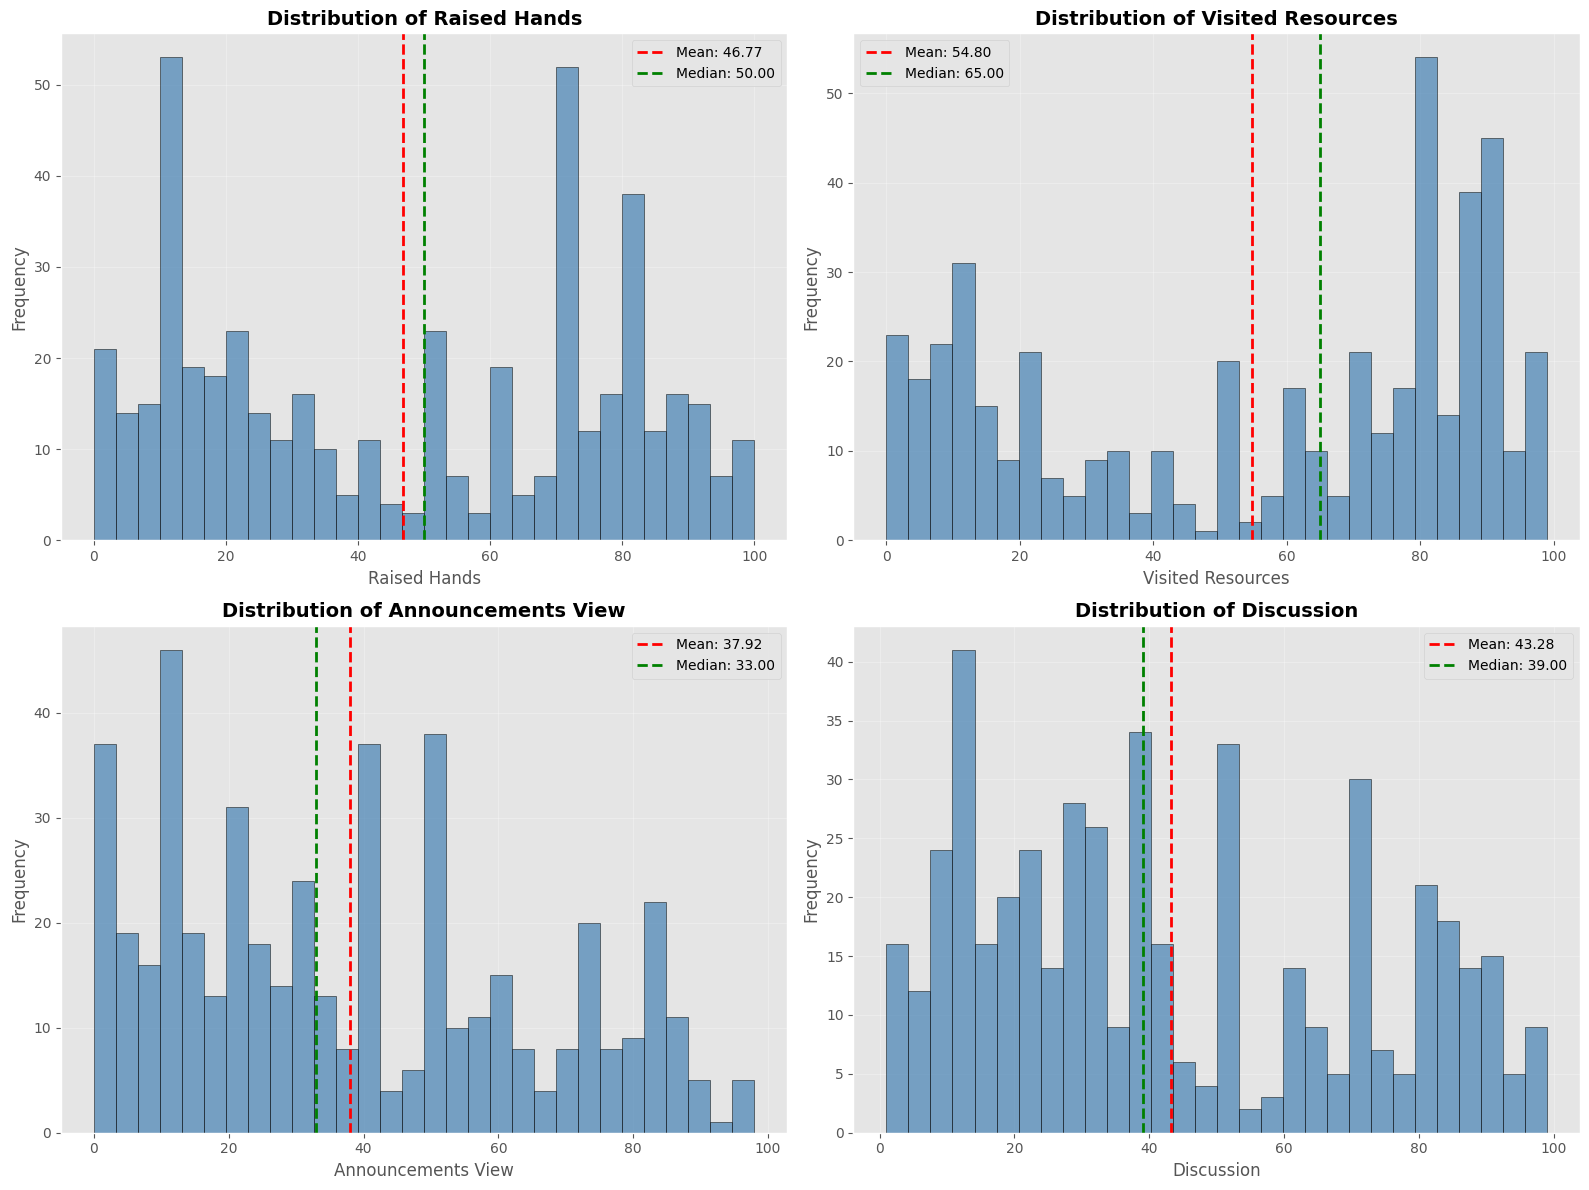

In [12]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    axes[idx].hist(df_clean[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].axvline(df_clean[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean[col].mean():.2f}')
    axes[idx].axvline(df_clean[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean[col].median():.2f}')
    col_label = get_display_label(col)
    axes[idx].set_title(f'Distribution of {col_label}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col_label, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


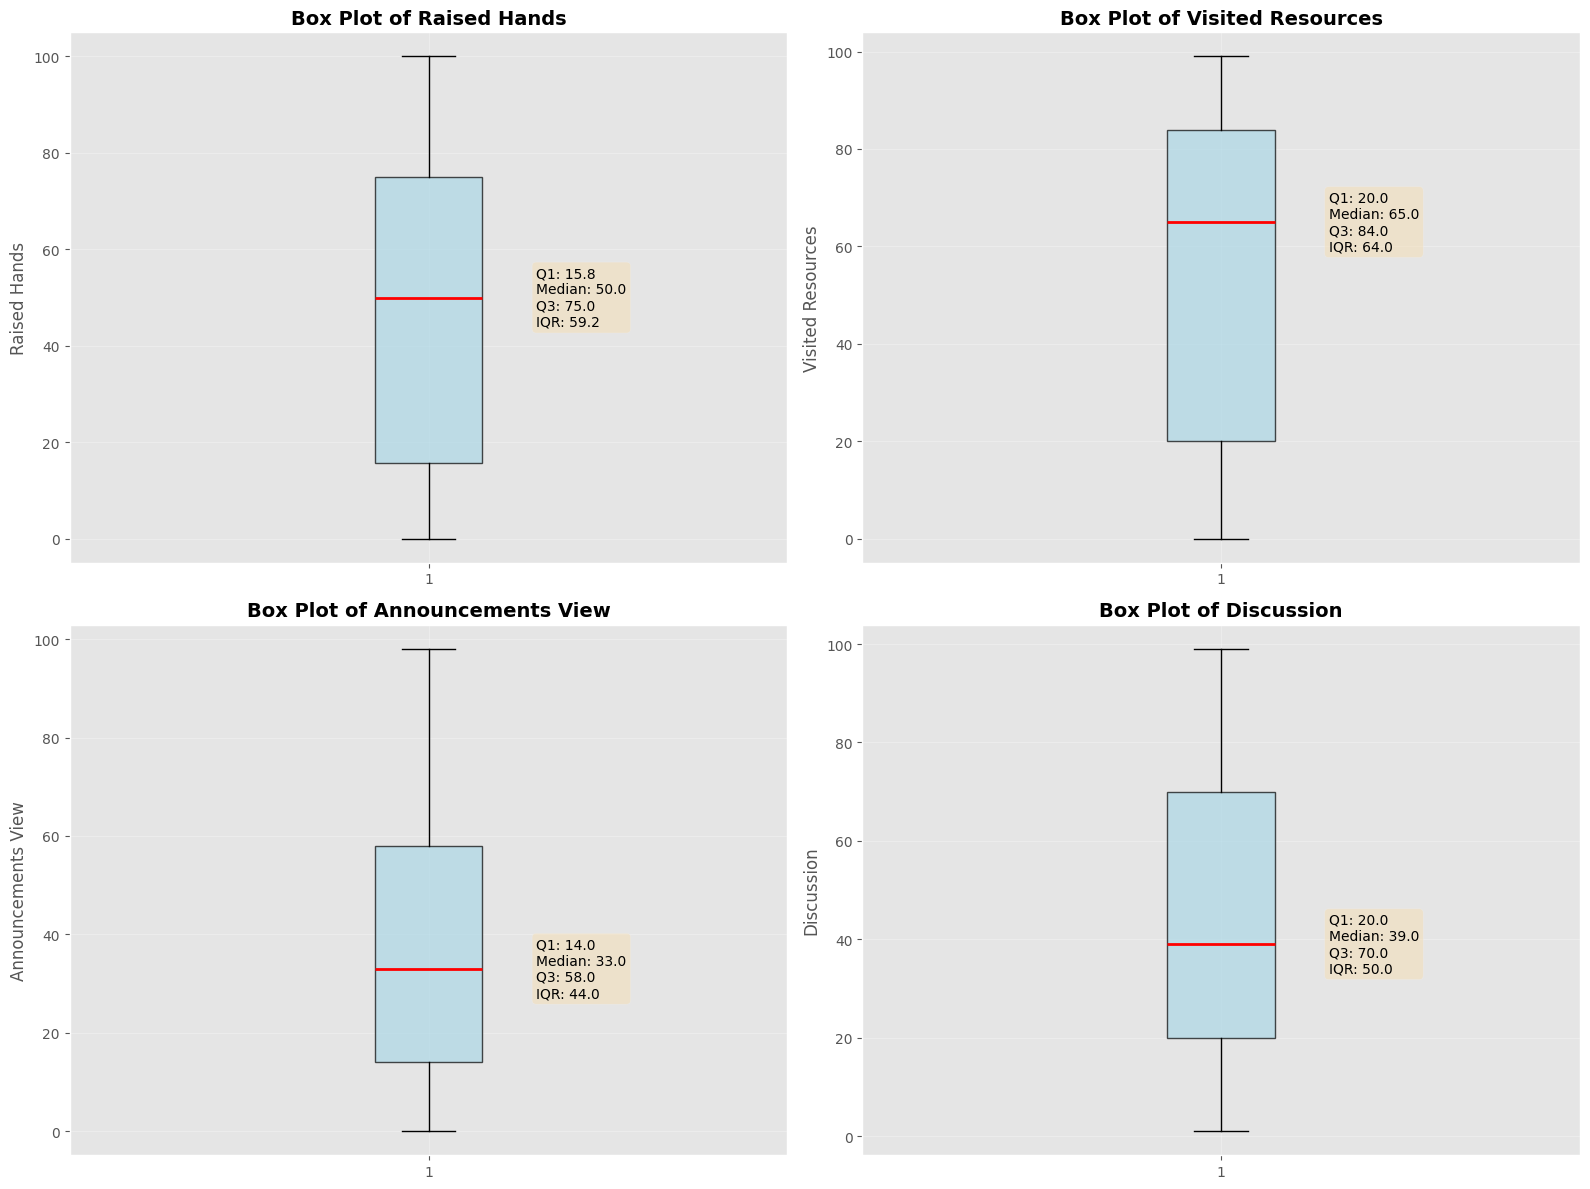

In [14]:
# Box plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    bp = axes[idx].boxplot(df_clean[col], patch_artist=True, 
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
    col_label = get_display_label(col)
    axes[idx].set_title(f'Box Plot of {col_label}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(col_label, fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f"Q1: {df_clean[col].quantile(0.25):.1f}\n"
    stats_text += f"Median: {df_clean[col].median():.1f}\n"
    stats_text += f"Q3: {df_clean[col].quantile(0.75):.1f}\n"
    stats_text += f"IQR: {df_clean[col].quantile(0.75) - df_clean[col].quantile(0.25):.1f}"
    axes[idx].text(1.15, df_clean[col].median(), stats_text, 
                   verticalalignment='center', fontsize=10, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


## 6. Univariate Analysis - Categorical Features


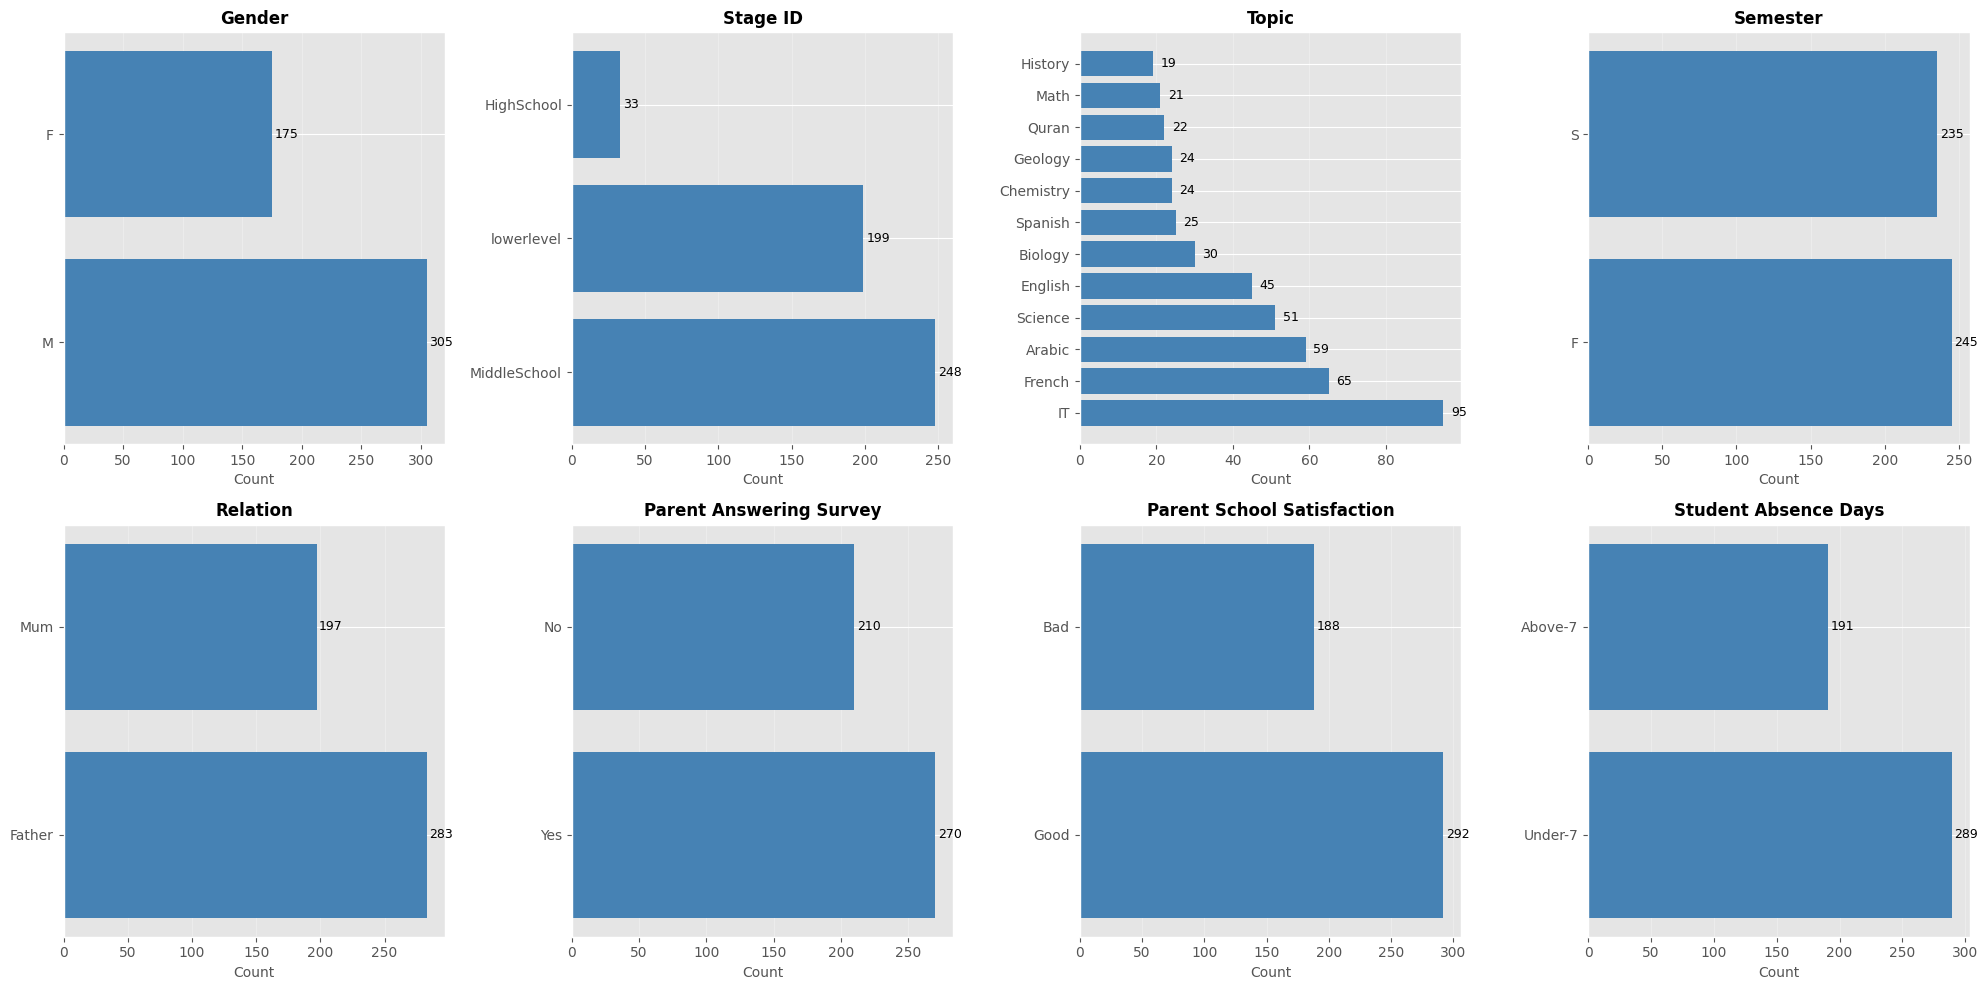

In [15]:
# Key categorical features visualization
key_categorical = ['gender', 'StageID', 'Topic', 'Semester', 'Relation', 
                   'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    if col in df_clean.columns:
        value_counts = df_clean[col].value_counts()
        axes[idx].barh(range(len(value_counts)), value_counts.values, color='steelblue')
        axes[idx].set_yticks(range(len(value_counts)))
        axes[idx].set_yticklabels(value_counts.index)
        col_label = get_display_label(col)
        axes[idx].set_title(f'{col_label}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Count', fontsize=10)
        axes[idx].grid(True, alpha=0.3, axis='x')
        
        # Add count labels
        for i, v in enumerate(value_counts.values):
            axes[idx].text(v + 2, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 7. Bivariate Analysis - Numerical Features vs Target


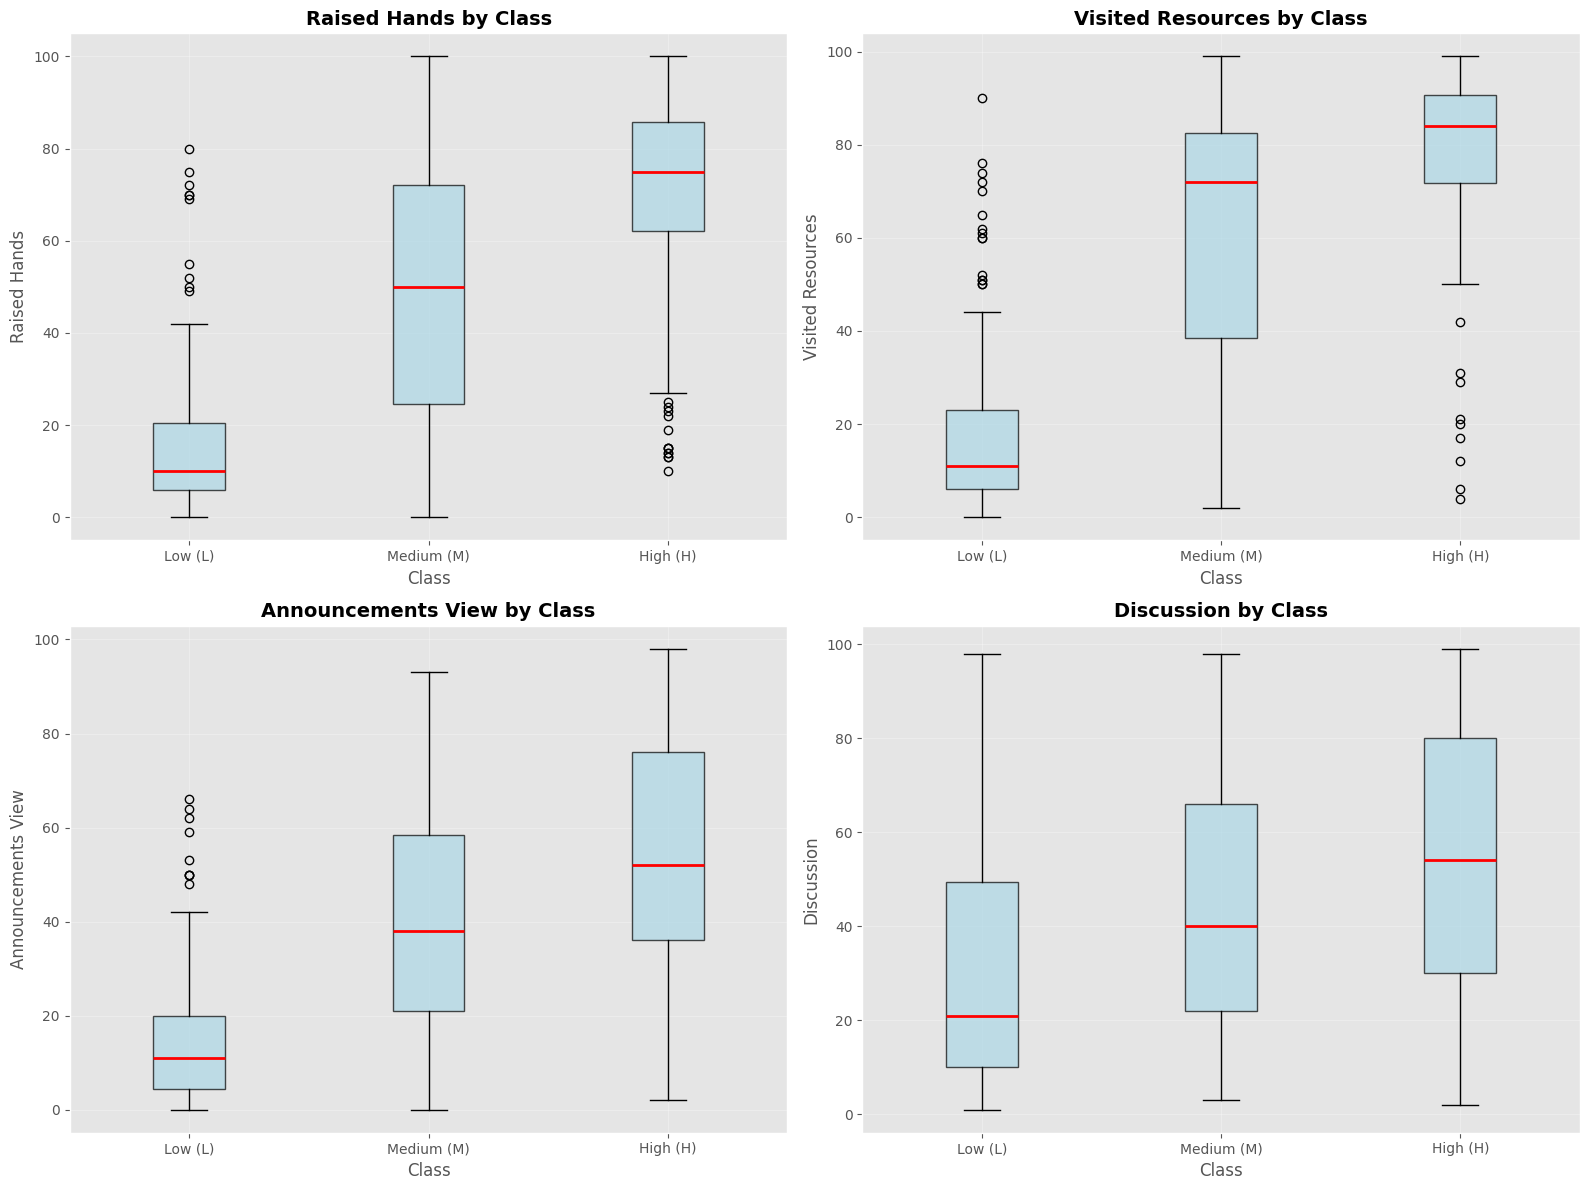

In [16]:
# Numerical features grouped by target class
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

sorted_classes = get_sorted_classes(df_clean, target_col)
class_labels = get_class_labels(sorted_classes)

for idx, col in enumerate(numerical_cols):
    # Create grouped box plot
    data_to_plot = [df_clean[df_clean[target_col] == cls][col].values 
                    for cls in sorted_classes]
    
    bp = axes[idx].boxplot(data_to_plot, labels=class_labels,
                          patch_artist=True,
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
    
    col_label = get_display_label(col)
    axes[idx].set_title(f'{col_label} by Class', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Class', fontsize=12)
    axes[idx].set_ylabel(col_label, fontsize=12)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [17]:
# Statistical summary by class
print("=" * 60)
print("NUMERICAL FEATURES SUMMARY BY CLASS")
print("=" * 60)

for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 40)
    summary_by_class = df_clean.groupby(target_col)[col].agg(['mean', 'median', 'std', 'min', 'max'])
    print(summary_by_class)


NUMERICAL FEATURES SUMMARY BY CLASS

raisedhands:
----------------------------------------
            mean  median        std  min  max
Class                                        
H      70.288732    75.0  22.543443   10  100
L      16.889764    10.0  17.209368    0   80
M      48.938389    50.0  26.893635    0  100

VisitedResources:
----------------------------------------
            mean  median        std  min  max
Class                                        
H      78.746479    84.0  19.356468    4   99
L      18.322835    11.0  19.187000    0   90
M      60.635071    72.0  28.229746    2   99

AnnouncementsView:
----------------------------------------
            mean  median        std  min  max
Class                                        
H      53.380282    52.0  25.055041    2   98
L      15.574803    11.0  15.314440    0   66
M      40.962085    38.0  24.086916    0   93

Discussion:
----------------------------------------
            mean  median        std  min  ma

## 8. Bivariate Analysis - Categorical Features vs Target


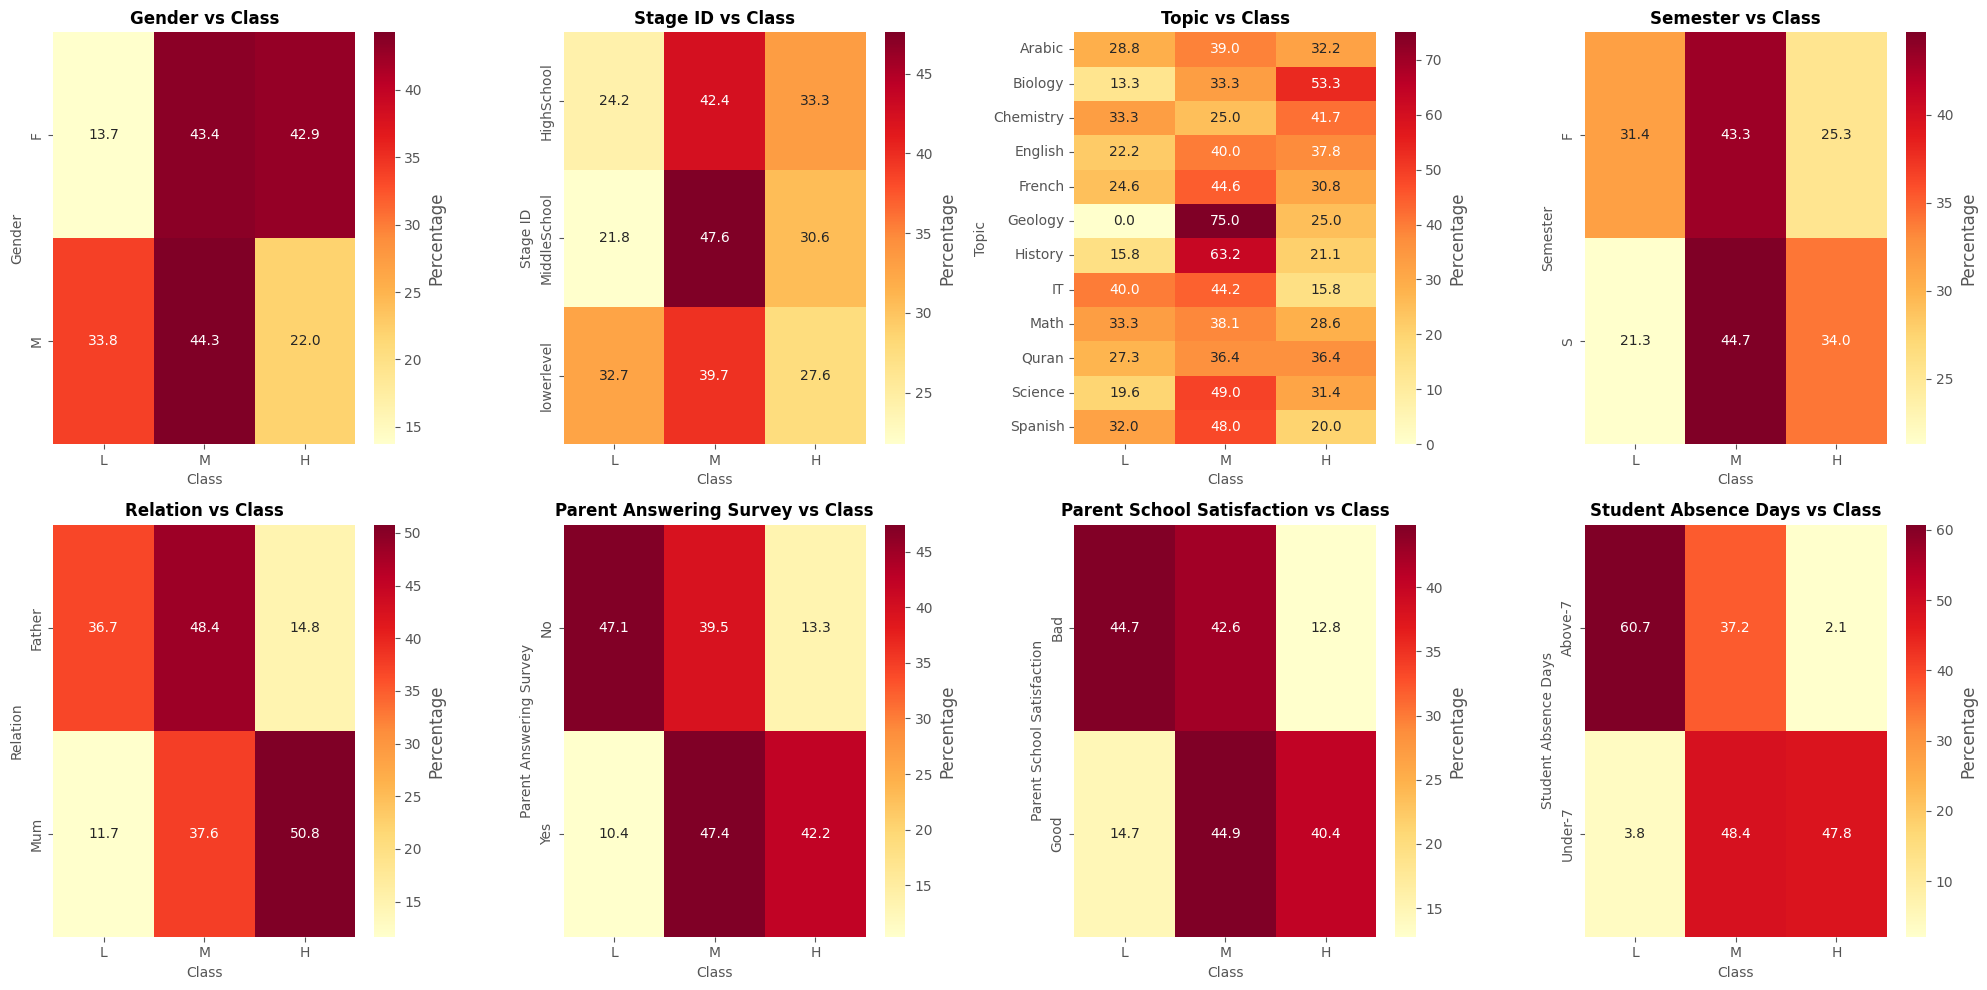

In [18]:
# Create crosstab heatmaps for key categorical features
key_features = ['gender', 'StageID', 'Topic', 'Semester', 'Relation', 
                'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

sorted_classes = get_sorted_classes(df_clean, target_col)

for idx, col in enumerate(key_features):
    if col in df_clean.columns:
        crosstab = pd.crosstab(df_clean[col], df_clean[target_col], normalize='index') * 100
        crosstab = crosstab.reindex(columns=sorted_classes)
        sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='YlOrRd', 
                   cbar_kws={'label': 'Percentage'}, ax=axes[idx])
        col_label = get_display_label(col)
        axes[idx].set_title(f'{col_label} vs Class', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Class', fontsize=10)
        axes[idx].set_ylabel(col_label, fontsize=10)

plt.tight_layout()
plt.show()


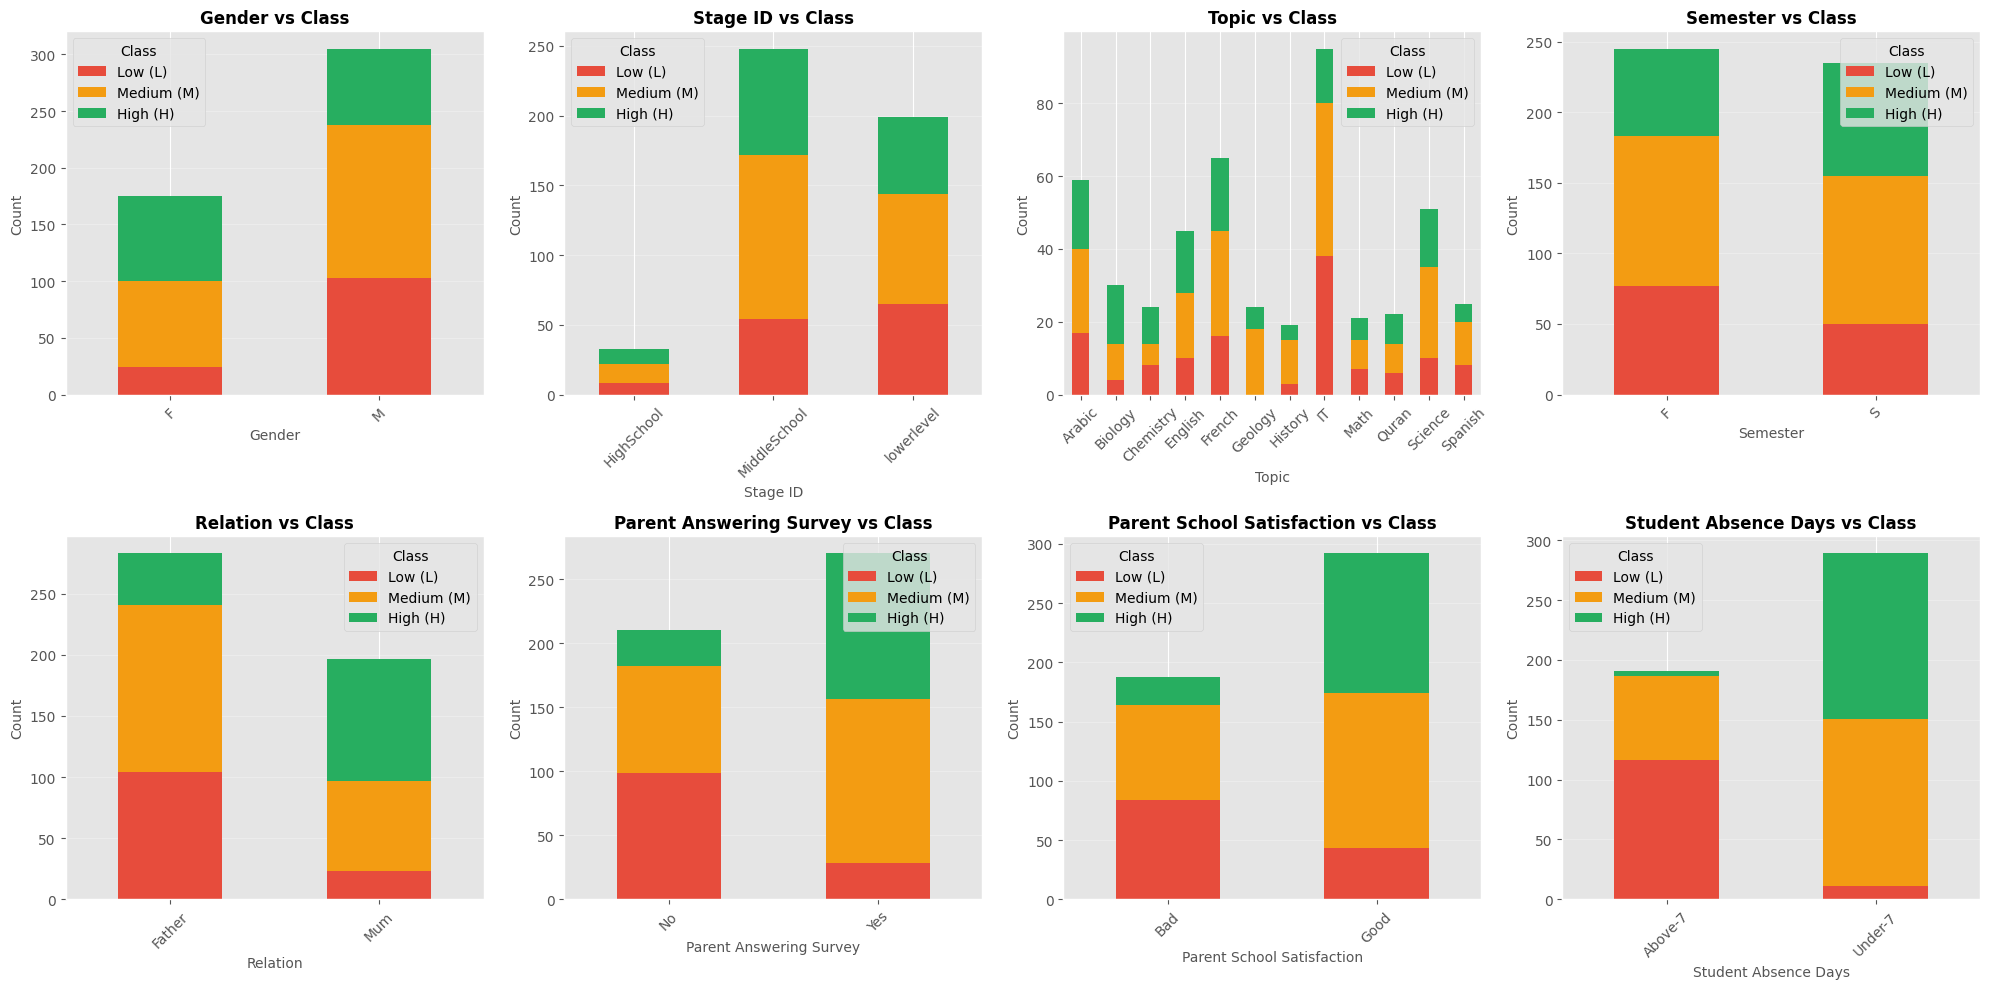

In [19]:
# Stacked bar charts for categorical features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

sorted_classes = get_sorted_classes(df_clean, target_col)
class_labels = get_class_labels(sorted_classes)

for idx, col in enumerate(key_features):
    if col in df_clean.columns:
        crosstab = pd.crosstab(df_clean[col], df_clean[target_col])
        crosstab = crosstab.reindex(columns=sorted_classes)
        crosstab.plot(kind='bar', stacked=True, ax=axes[idx], 
                     color=['#e74c3c', '#f39c12', '#27ae60'])
        col_label = get_display_label(col)
        axes[idx].set_title(f'{col_label} vs Class', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col_label, fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].legend(title='Class', labels=class_labels)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 9. Correlation Analysis


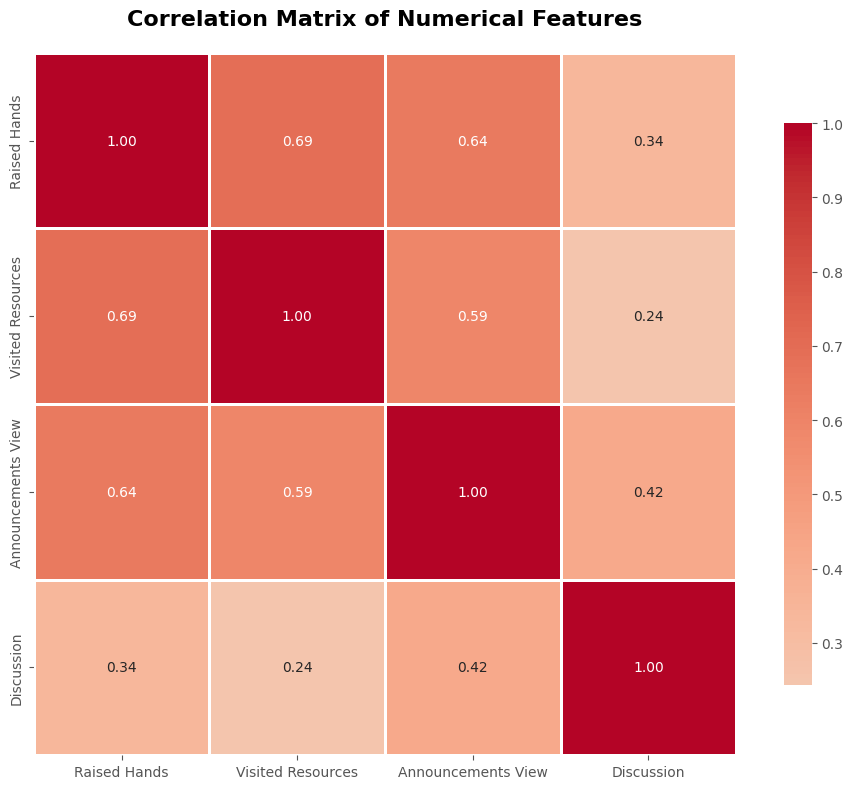

In [21]:
# Correlation matrix for numerical features
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8))
# Create display labels for correlation matrix
display_labels = [get_display_label(col) for col in numerical_cols]
correlation_matrix_display = correlation_matrix.copy()
correlation_matrix_display.index = display_labels
correlation_matrix_display.columns = display_labels
sns.heatmap(correlation_matrix_display, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


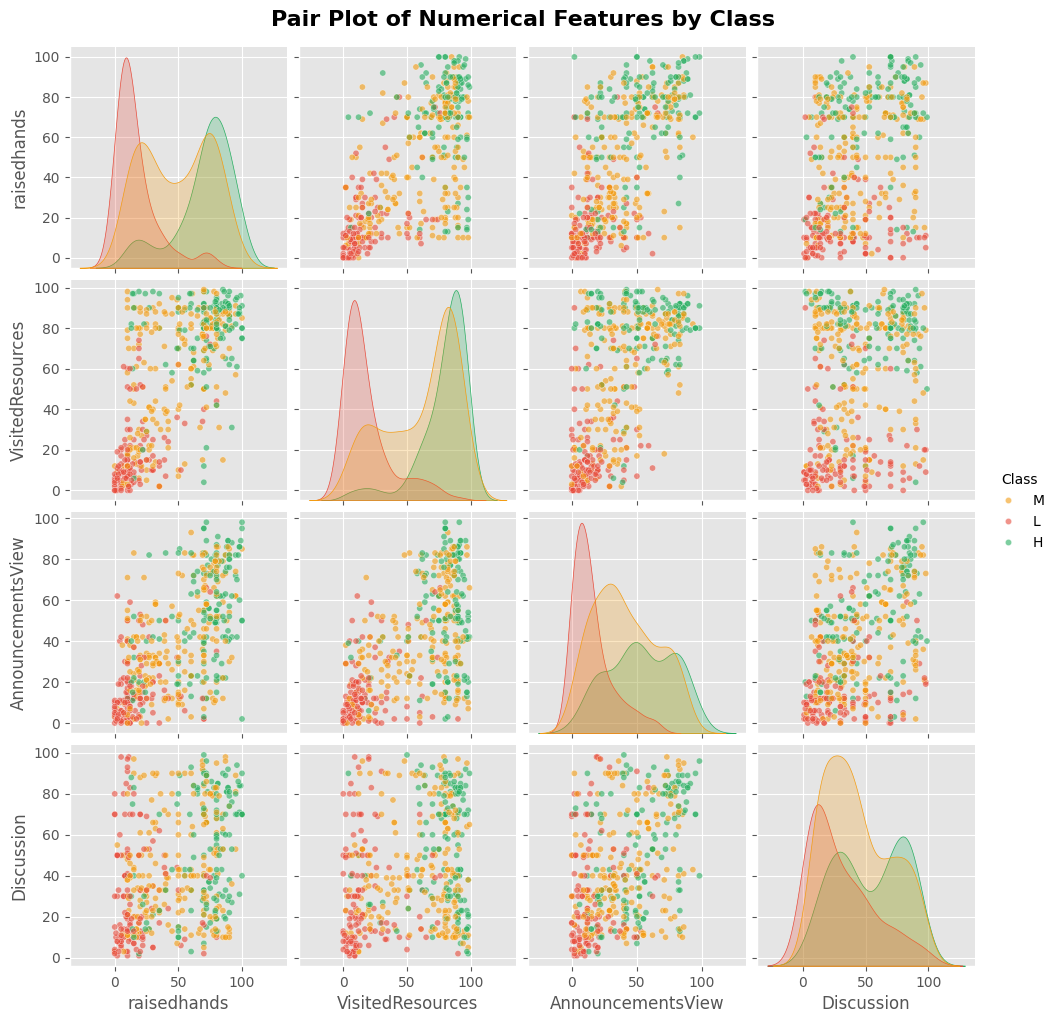

In [22]:
# Pair plot for numerical features colored by target
# Using a sample for better visualization if dataset is large
sample_size = min(480, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

# Create pair plot
g = sns.pairplot(df_sample, vars=numerical_cols, hue=target_col, 
                palette={'L': '#e74c3c', 'M': '#f39c12', 'H': '#27ae60'},
                diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
g.fig.suptitle('Pair Plot of Numerical Features by Class', 
               fontsize=16, fontweight='bold', y=1.02)
plt.show()


## 10. Feature Engineering Insights


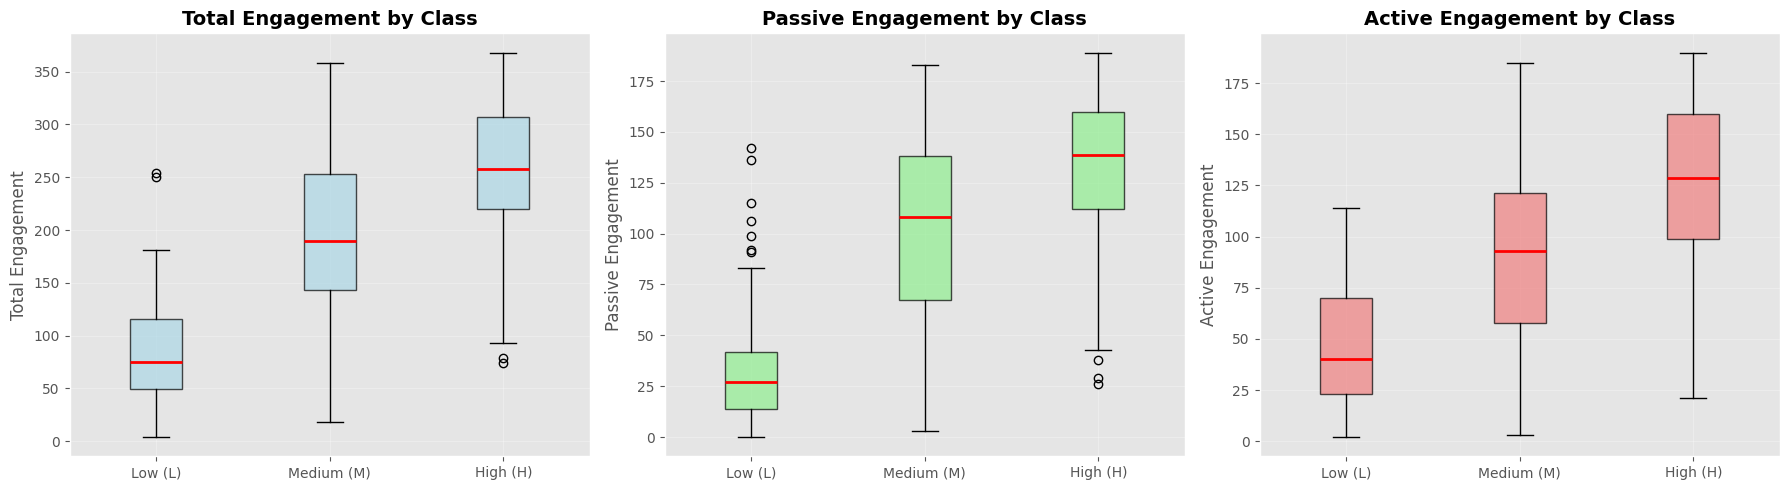

In [23]:
# Create interaction features
df_clean['TotalEngagement'] = (df_clean['raisedhands'] + 
                               df_clean['VisitedResources'] + 
                               df_clean['AnnouncementsView'] + 
                               df_clean['Discussion'])

# Passive Engagement: Consuming content (viewing resources and announcements)
df_clean['PassiveEngagement'] = (df_clean['VisitedResources'] + 
                                 df_clean['AnnouncementsView'])

# Active Engagement: Participating/interacting (raising hands and discussions)
df_clean['ActiveEngagement'] = (df_clean['raisedhands'] + 
                                df_clean['Discussion'])

# Visualize new features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sorted_classes = get_sorted_classes(df_clean, target_col)
class_labels = get_class_labels(sorted_classes)

# Total Engagement by Class
data_to_plot = [df_clean[df_clean[target_col] == cls]['TotalEngagement'].values 
                for cls in sorted_classes]
axes[0].boxplot(data_to_plot, labels=class_labels,
           patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Total Engagement by Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Engagement', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Passive Engagement by Class
data_to_plot = [df_clean[df_clean[target_col] == cls]['PassiveEngagement'].values 
                for cls in sorted_classes]
axes[1].boxplot(data_to_plot, labels=class_labels,
           patch_artist=True,
           boxprops=dict(facecolor='lightgreen', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Passive Engagement by Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Passive Engagement', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Active Engagement by Class
data_to_plot = [df_clean[df_clean[target_col] == cls]['ActiveEngagement'].values 
                for cls in sorted_classes]
axes[2].boxplot(data_to_plot, labels=class_labels,
           patch_artist=True,
           boxprops=dict(facecolor='lightcoral', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
axes[2].set_title('Active Engagement by Class', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Active Engagement', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Key Insights and Summary


In [24]:
# Summary statistics
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df_clean)}")
print(f"   - Total features: {len(df_clean.columns)}")
print(f"   - Missing values: {df_clean.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df_clean.duplicated().sum()}")

print("\n2. TARGET VARIABLE DISTRIBUTION:")
sorted_classes = get_sorted_classes(df_clean, target_col)
for cls in sorted_classes:
    count = (df_clean[target_col] == cls).sum()
    pct = (count / len(df_clean)) * 100
    print(f"   - Class {cls}: {count} ({pct:.1f}%)")

print("\n3. NUMERICAL FEATURES SUMMARY:")
for col in numerical_cols:
    print(f"\n   {col}:")
    print(f"      Mean: {df_clean[col].mean():.2f}")
    print(f"      Median: {df_clean[col].median():.2f}")
    print(f"      Std Dev: {df_clean[col].std():.2f}")
    print(f"      Range: [{df_clean[col].min()}, {df_clean[col].max()}]")

print("\n4. CORRELATIONS (Top 3):")
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs != 1.0]  # Remove self-correlations
# Filter to avoid duplicate pairs (A-B and B-A are the same)
# Keep only pairs where first element < second element (alphabetically)
corr_pairs_filtered = corr_pairs[[pair[0] < pair[1] for pair in corr_pairs.index]]
print("   Top correlations:")
for i, (pair, value) in enumerate(corr_pairs_filtered.head(3).items(), 1):
    print(f"   {i}. {pair[0]} - {pair[1]}: {value:.3f}")

print("\n5. CLASS PERFORMANCE BY KEY FEATURES:")
print("\n   By Gender:")
gender_class = pd.crosstab(df_clean['gender'], df_clean[target_col], normalize='index') * 100
print(gender_class.round(1))

print("\n   By Parent Answering Survey:")
parent_class = pd.crosstab(df_clean['ParentAnsweringSurvey'], df_clean[target_col], normalize='index') * 100
print(parent_class.round(1))

print("\n   By Student Absence Days:")
absence_class = pd.crosstab(df_clean['StudentAbsenceDays'], df_clean[target_col], normalize='index') * 100
print(absence_class.round(1))


KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - Total records: 480
   - Total features: 20
   - Missing values: 0
   - Duplicate rows: 2

2. TARGET VARIABLE DISTRIBUTION:
   - Class L: 127 (26.5%)
   - Class M: 211 (44.0%)
   - Class H: 142 (29.6%)

3. NUMERICAL FEATURES SUMMARY:

   raisedhands:
      Mean: 46.77
      Median: 50.00
      Std Dev: 30.78
      Range: [0, 100]

   VisitedResources:
      Mean: 54.80
      Median: 65.00
      Std Dev: 33.08
      Range: [0, 99]

   AnnouncementsView:
      Mean: 37.92
      Median: 33.00
      Std Dev: 26.61
      Range: [0, 98]

   Discussion:
      Mean: 43.28
      Median: 39.00
      Std Dev: 27.64
      Range: [1, 99]

4. CORRELATIONS (Top 3):
   Top correlations:
   1. VisitedResources - raisedhands: 0.692
   2. AnnouncementsView - raisedhands: 0.644
   3. AnnouncementsView - VisitedResources: 0.595

5. CLASS PERFORMANCE BY KEY FEATURES:

   By Gender:
Class      H     L     M
gender                  
F       42.9  13.7  43.4
M    

## 12. Final Visualizations - Comprehensive Overview


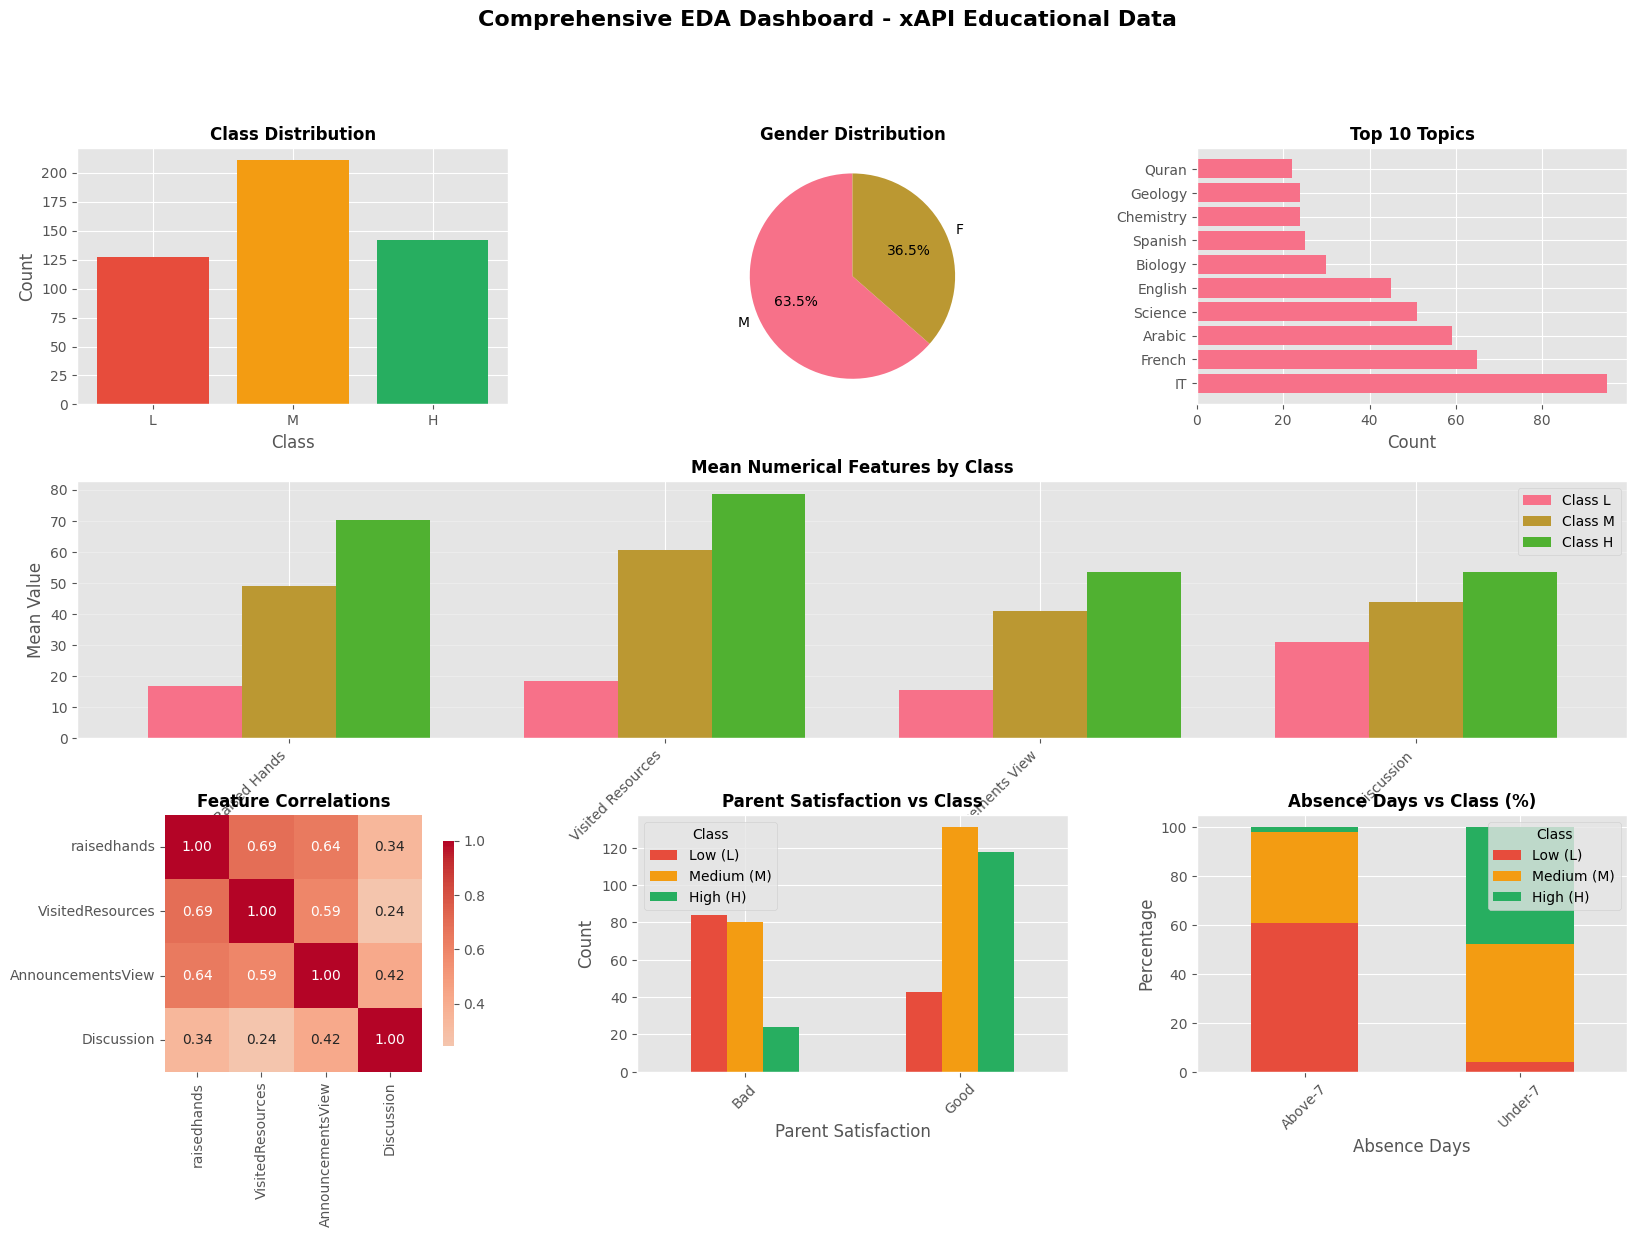

In [23]:
# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Class distribution (top left)
ax1 = fig.add_subplot(gs[0, 0])
sorted_classes = get_sorted_classes(df_clean, target_col)
class_counts = df_clean[target_col].value_counts().reindex(sorted_classes)
ax1.bar(class_counts.index, class_counts.values, color=['#e74c3c', '#f39c12', '#27ae60'])
ax1.set_title('Class Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')

# 2. Gender distribution (top middle)
ax2 = fig.add_subplot(gs[0, 1])
gender_counts = df_clean['gender'].value_counts()
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Gender Distribution', fontsize=12, fontweight='bold')

# 3. Topic distribution (top right)
ax3 = fig.add_subplot(gs[0, 2])
topic_counts = df_clean['Topic'].value_counts().head(10)
ax3.barh(range(len(topic_counts)), topic_counts.values)
ax3.set_yticks(range(len(topic_counts)))
ax3.set_yticklabels(topic_counts.index)
ax3.set_title('Top 10 Topics', fontsize=12, fontweight='bold')
ax3.set_xlabel('Count')

# 4. Numerical features mean by class (middle row)
ax4 = fig.add_subplot(gs[1, :])
sorted_classes = get_sorted_classes(df_clean, target_col)
class_means = df_clean.groupby(target_col)[numerical_cols].mean().reindex(sorted_classes)
x = np.arange(len(numerical_cols))
width = 0.25
for i, cls in enumerate(sorted_classes):
    offset = (i - 1) * width
    ax4.bar(x + offset, class_means.loc[cls], width, label=f'Class {cls}')
ax4.set_xlabel('Features', fontsize=12)
ax4.set_ylabel('Mean Value', fontsize=12)
ax4.set_title('Mean Numerical Features by Class', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
display_labels = [get_display_label(col) for col in numerical_cols]
ax4.set_xticklabels(display_labels, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Correlation heatmap (bottom left)
ax5 = fig.add_subplot(gs[2, 0])
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, ax=ax5, cbar_kws={"shrink": 0.8})
ax5.set_title('Feature Correlations', fontsize=12, fontweight='bold')

# 6. Parent satisfaction vs class (bottom middle)
ax6 = fig.add_subplot(gs[2, 1])
sorted_classes = get_sorted_classes(df_clean, target_col)
class_labels = get_class_labels(sorted_classes)
parent_sat_cross = pd.crosstab(df_clean['ParentschoolSatisfaction'], df_clean[target_col])
parent_sat_cross = parent_sat_cross.reindex(columns=sorted_classes)
parent_sat_cross.plot(kind='bar', ax=ax6, color=['#e74c3c', '#f39c12', '#27ae60'])
ax6.set_title('Parent Satisfaction vs Class', fontsize=12, fontweight='bold')
ax6.set_xlabel('Parent Satisfaction')
ax6.set_ylabel('Count')
ax6.legend(title='Class', labels=class_labels)
ax6.tick_params(axis='x', rotation=45)

# 7. Absence days vs class (bottom right)
ax7 = fig.add_subplot(gs[2, 2])
absence_cross = pd.crosstab(df_clean['StudentAbsenceDays'], df_clean[target_col], normalize='index') * 100
absence_cross = absence_cross.reindex(columns=sorted_classes)
absence_cross.plot(kind='bar', stacked=True, ax=ax7, color=['#e74c3c', '#f39c12', '#27ae60'])
ax7.set_title('Absence Days vs Class (%)', fontsize=12, fontweight='bold')
ax7.set_xlabel('Absence Days')
ax7.set_ylabel('Percentage')
ax7.legend(title='Class', labels=class_labels)
ax7.tick_params(axis='x', rotation=45)

plt.suptitle('Comprehensive EDA Dashboard - xAPI Educational Data', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()
